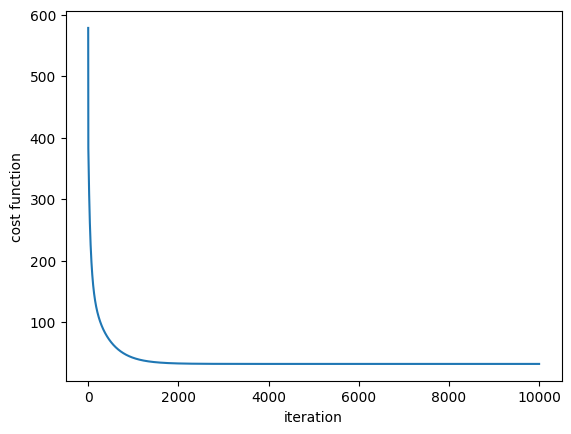

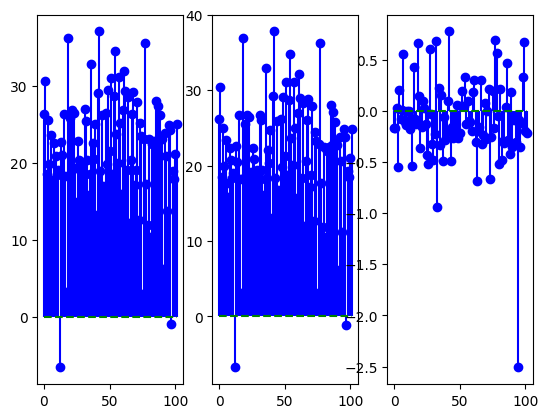

0.17126052


In [1]:
# HW1 - problem 1. House price prediction using linear regression


# import library
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


# Data preprocessing
boston = pd.read_csv('Boston_house.csv') #CSV 파일에서 데이터를 읽어 Pandas DataFrame으로 변환
X = boston[['CRIM','RM', 'LSTAT', 'AGE']] #특징 데이터를 추출
y = boston[['Target']] #타겟 변수를 추출

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #훈련 데이터와 테스트 데이터로 분할
X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

# Model parameter
W = tf.Variable(tf.random.normal([4,1])) #학습 가능한 변수를 생성
b = tf.Variable(tf.random.normal([1]))

# learning rate
learning_rate = 1e-4


# Gradient descent
def gradientDescent():
  with tf.GradientTape() as tape: #자동 미분을 위한 컨텍스트를 생성


    # predicted value: Wx + b
    pred = tf.matmul(X_train,W) + b #행렬 곱셈을 수행하여 예측값을 계산


    # cost function
    cost = tf.reduce_mean(tf.square(pred - y_train)) #오차 제곱의 평균을 계산하여 손실 함수를 계산


    # Parameter update: (Stochastic) Gradient Descent
    gradients = tape.gradient(cost,[W,b]) #손실 함수에 대한 가중치와 편향의 기울기를 계산
    tf.optimizers.SGD(learning_rate).apply_gradients(zip(gradients,[W,b])) #경사 하강법을 이용하여 가중치와 편향을 업데이트


cost = []
for step in range(10001):

  # 학습
  gradientDescent()


  # 학습에 따른 cost 값 저장
  pred = tf.matmul(X_test,W) + b
  cost_inst = tf.reduce_mean(tf.square(pred - y_test)) #예측값과 실제 값의 차이의 제곱의 평균 (MSE, Mean Squared Error)를 계산하여 현재 시점의 손실 값을 구함
  cost = np.append(cost, cost_inst) #리스트에 손실 값을 저장하여 학습 과정을 시각화

############## 분석
import matplotlib.pyplot as plt


# plot cost function
plt.plot(cost) #리스트에 저장된 손실 값을 그래프로 나타냄. x축은 학습 반복 횟수, y축은 손실 값
plt.xlabel('iteration')
plt.ylabel('cost function')
plt.show()


# Scikit-learn library 이용한 linear regression model 및 학습
from sklearn.linear_model import LinearRegression
reg = LinearRegression() #Scikit-learn의 선형 회귀 모델을 생성
reg.fit(X_train, y_train) #Scikit-learn 모델을 훈련 데이터로 학습


# library 이용한 모델을 통해서 얻은 예측값
pred_lib = reg.predict(X_test) #학습된 Scikit-learn 모델을 이용하여 테스트 데이터에 대한 예측값을 계산


# 직접 구현한 모델을 통해서 얻은 예측값
pred_nolib = tf.matmul(X_test,W) + b # 직접 구현한 모델을 이용하여 테스트 데이터에 대한 예측값을 계산


# 예측값 비교
fig, axs = plt.subplots(1, 3) # 1행 3열의 서브플롯을 생성
axs[0].stem(pred_nolib, linefmt='b-', markerfmt='bo', basefmt='g--') #직접 구현한 모델의 예측값
axs[1].stem(pred_lib, linefmt='b-', markerfmt='bo', basefmt='g--') #Scikit-learn 모델의 예측값
axs[2].stem(pred_lib-pred_nolib, linefmt='b-', markerfmt='bo', basefmt='g--') #두 모델의 예측값 차이
plt.show()
 #linefmt='b-' : 줄기 (stem)의 형식을 지정. 'b-'는 파란색 실선을 의미
 #markerfmt='bo' : 줄기 끝의 마커의 형식을 지정. 'bo'는 파란색 원형 마커를 의미
 #basefmt='g--' : 기준선 (baseline)의 형식을 지정.'g--'는 초록색 점선을 의미


# library 예측값과 직접 구현 예측값 간의 차이 비교
error = tf.reduce_mean(tf.square(pred_nolib - pred_lib)) #두 모델의 예측값 차이의 제곱의 평균을 계산하여 오차 구하기
print(error.numpy()) # 계산된 오차 값을 출력